In [198]:
cd "~/dropbox"

/Users/agrimabahl/Dropbox


In [264]:
import math
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
tr = scipy.io.loadmat('spam_data.mat')

In [265]:
Xtrain=tr["training_data"]
Ytrain=tr["training_labels"][0]
Xtest=tr["test_data"]

In [201]:
from sklearn import preprocessing

In [202]:
#Pre-Pro (i)
Xtrain=np.asfarray(Xtrain)
for i in range(0,32):
    Xtrain[:,i]=preprocessing.scale(Xtrain[:,i])

In [255]:
#Pre-Pro (ii)
#doubt!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Xtrain2=np.asfarray(Xtrain)
for i in range(0,5172):
    for j in range(0,32):
        Xtrain2[i][j]=np.log(Xtrain[i][j]+0.1)

In [266]:
#Pre-Pro (iii)
for i in range(0,5172):
    for j in range(0,32):
        if Xtrain[i][j]>0:
            Xtrain[i][j]=1
        else:
            Xtrain[i][j]=0

In [257]:
Xtrain2 = np.insert(Xtrain2, 32, values=1, axis=1)

In [215]:
def logistic(x):
    return 1/(1 + np.exp(-x))

In [216]:
def risk(a,kern,X,Y):
    risk_f=0
    for i in range(0,len(X)):
        #wx=w.transpose().dot(X[i])
        Ka=a.dot(kern[i])
        sig=logistic(Ka)
        if sig==1:
            sig=0.99999995
        if sig==0:
            sig=0.00000005
        risk_f+=-(Y[i]*np.log(sig)+(1-Y[i])*np.log(1-sig))
    return risk_f

In [251]:
def kernel(X,Y):
    a=np.zeros(len(X),dtype='float')
    a[0]=1
    #a=np.random.rand
    rho=0.01
    kern=kern_matrix(X,X,rho)
    #maxiter=1000
    eps=0.000001
    risk_fn=np.zeros(len(X)/50+1,dtype='float')
    for i in range(len(X)):
        Ka=a.dot(kern[i])
        #sig=logistic(Ka)
        #if sig==1:
        #    sig=0.99999995
        #if sig==0:
        #    sig=0.00000005
        if i%50 ==0:
            j=int(i/50)
            #risk_fn[j]=risk(w,X,Y)
            risk_fn[j]=risk(a,kern,X,Y)
        a=a+eps*(Y[i]-logistic(Ka))
        print("at iter",i)
        print("Risk fn value=",risk_fn[j])
        print("dual weights are",a)
    return risk_fn,a    

In [245]:
def k(x,z,rho):
    kern=x.transpose().dot(z)+rho
    return kern

In [258]:
from sklearn.utils import shuffle
Xtrain2, Ytrain = shuffle(Xtrain2, Ytrain, random_state=0)

In [237]:
def kern_matrix(X,Z,rho):
    kern_mat=np.zeros(shape=(len(X),len(Z)))
    for i in range(len(X)):
        for j in range(len(Z)):
            kern_mat[i][j]=k(X[i],Z[j],rho)
    return kern_mat        

In [259]:
Xtraining=Xtrain2[0:3448]

In [260]:
Ytraining=Ytrain[0:3448]

In [261]:
Xvalid=Xtrain2[3448:]
Yvalid=Ytrain[3448:]

In [262]:
risk_func,weights=kernel(Xtraining,Ytraining)

at iter 0
Risk fn value= 40649.5852167
dual weights are [  9.99999000e-01  -1.00000000e-06  -1.00000000e-06 ...,  -1.00000000e-06
  -1.00000000e-06  -1.00000000e-06]
at iter 1
Risk fn value= 40649.5852167
dual weights are [  9.99999000e-01  -1.00000000e-06  -1.00000000e-06 ...,  -1.00000000e-06
  -1.00000000e-06  -1.00000000e-06]
at iter 2
Risk fn value= 40649.5852167
dual weights are [  9.99998000e-01  -2.00000000e-06  -2.00000000e-06 ...,  -2.00000000e-06
  -2.00000000e-06  -2.00000000e-06]
at iter 3
Risk fn value= 40649.5852167
dual weights are [  9.99997000e-01  -3.00000000e-06  -3.00000000e-06 ...,  -3.00000000e-06
  -3.00000000e-06  -3.00000000e-06]
at iter 4
Risk fn value= 40649.5852167
dual weights are [  9.99996000e-01  -4.00000000e-06  -4.00000000e-06 ...,  -4.00000000e-06
  -4.00000000e-06  -4.00000000e-06]
at iter 5
Risk fn value= 40649.5852167
dual weights are [  9.99996000e-01  -4.00000000e-06  -4.00000000e-06 ...,  -4.00000000e-06
  -4.00000000e-06  -4.00000000e-06]
at i

/Users/agrimabahl/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


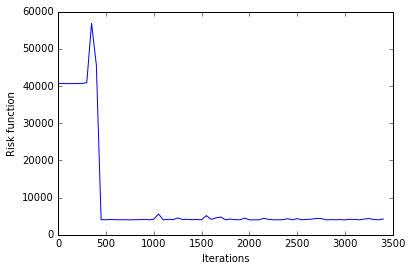

In [263]:
x = [i*50 for i in range(len(risk_func))]
plt.plot(x,risk_func)
plt.ylabel('Risk function')
plt.xlabel('Iterations')
plt.show()

In [2]:
import matplotlib.pyplot as plt



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [152]:
def predict(a,Xtrain, Xvalid):
    pred_values=np.zeros(len(Xvalid))
    kern=kern_matrix(Xvalid,Xtrain,1)
    for i in range(len(Xvalid)):
        Ka=a.dot(kern[i])
        pred=logistic(Ka)
        if pred<=0.5:
            pred_values[i]=0
        else:
            pred_values[i]=1
    return pred_values        

In [149]:
sum(pred_val)

0.0

In [168]:
pred_val=predict(weights, Xtraining, Xvalid)

In [67]:
kern=kern_matrix(Xtraining,Xvalid,1)

In [68]:
kern.shape

(3448, 1724)

In [69]:
weights.shape

(3448,)

In [130]:
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices



In [169]:
benchmark(np.array(pred_val2),np.array(Yvalid))

(0.29466357308584684,
 (array([   0,    1,    2,    3,    7,   11,   15,   18,   20,   22,   23,
           24,   26,   27,   30,   35,   36,   38,   47,   49,   52,   53,
           54,   57,   58,   61,   66,   70,   71,   73,   81,   84,   86,
           87,   88,   91,   97,  103,  105,  109,  110,  112,  126,  128,
          131,  133,  135,  141,  142,  147,  151,  153,  154,  161,  164,
          171,  172,  178,  182,  200,  204,  209,  213,  223,  228,  229,
          239,  242,  248,  251,  255,  256,  257,  267,  270,  277,  278,
          283,  284,  289,  293,  306,  308,  309,  310,  311,  315,  318,
          325,  327,  328,  330,  331,  345,  363,  369,  376,  378,  394,
          396,  397,  401,  404,  406,  407,  408,  410,  411,  412,  415,
          417,  421,  428,  430,  432,  437,  439,  443,  445,  448,  449,
          453,  454,  459,  467,  468,  469,  472,  475,  480,  481,  484,
          487,  488,  489,  505,  506,  507,  508,  512,  517,  519,  522,
   